#### Investigating the performance of a number of machine learning procedures on the dataset (CE802_P2_Data.zip)

In [1]:
# Importing the neccessary libraries for loading the data and visualization of data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('CE802_P2_Data.csv')

In [3]:
# Displaying the first five rows of the dataset using function head()
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.20,-4.91,-41.64,-21.63,8.41,2,5.42,-84.01,-9.40,76.72,-0.42,36,0.33,30.60,NaN,False
1,3.98,-5.25,-47.64,-23.43,8.66,2,4.32,-83.01,-11.16,2.72,0.50,111,0.84,39.42,9.26,True
2,12.60,0.41,-50.64,-15.51,16.34,20,-4.00,25.99,-15.08,450.72,-3.60,525,5.10,21.78,NaN,False
3,14.70,1.09,-50.64,-4.74,15.09,20,-8.16,10.99,-13.12,190.72,-5.71,660,7.25,15.78,6.57,False
4,2.74,-3.86,-35.64,-23.91,8.67,2,2.80,-53.01,-19.22,24.72,0.59,33,0.85,25.08,NaN,True


In [4]:
# Checking the shape i.e the total number of Rows and number of Features
df.shape

(1500, 16)

In [5]:
# Checking the data type of each feature and number of Null Values in each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   int64  
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB


Data Cleaning: Handling NA values

In [6]:
df.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

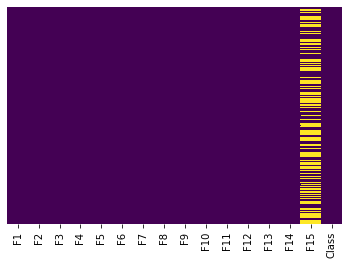

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# By analysing the data we can clearly see that there are about 750 null values in Feature - F15
# I will be taking the mean of the whole column and replace the null values with the mean
df['F15'] = df['F15'].fillna(df['F15'].mean())

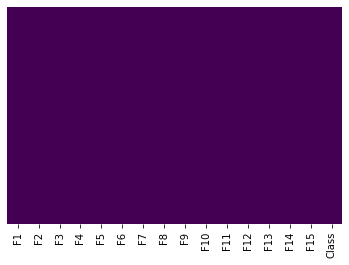

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Exploring the data

In [10]:
# Analysing the statistical information
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000
mean,9.93752,-2.668787,-58.554000,-14.751160,11.477813,10.806667,-1.270267,-64.596000,-11.144707,139.610667,-1.892467,327.07400,3.854280,22.179780,7.683013
std,8.65042,2.540644,21.477945,7.541549,3.166909,9.009814,5.090345,40.188448,2.217929,142.833748,2.491236,352.00374,3.465276,7.662813,0.710488
min,0.00000,-11.700000,-110.640000,-37.740000,7.790000,0.000000,-10.400000,-179.010000,-19.620000,-19.280000,-6.400000,0.00000,0.000000,8.760000,4.960000
25%,2.48000,-4.550000,-80.640000,-20.580000,8.510000,2.000000,-6.180000,-83.010000,-12.300000,28.720000,-4.270000,45.00000,0.600000,14.692500,7.683013
50%,4.14000,-3.650000,-47.640000,-17.700000,8.870000,2.000000,0.710000,-70.010000,-10.840000,68.720000,-0.940000,150.00000,1.020000,25.170000,7.683013
75%,16.40000,-0.190000,-41.640000,-7.530000,14.240000,20.000000,2.500000,-49.010000,-9.840000,260.720000,-0.057500,585.00000,7.050000,27.870000,7.690000
max,31.40000,1.990000,-32.640000,-1.320000,17.940000,20.000000,15.460000,35.990000,-6.420000,470.720000,5.840000,1170.00000,10.350000,47.370000,10.040000


In [11]:
# Converting True and False of the Class variable into 1's and 0's
df.replace({False: 0, True: 1}, inplace=True)

In [12]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.20,-4.91,-41.64,-21.63,8.41,2,5.42,-84.01,-9.40,76.72,-0.42,36,0.33,30.60,7.683013,0
1,3.98,-5.25,-47.64,-23.43,8.66,2,4.32,-83.01,-11.16,2.72,0.50,111,0.84,39.42,9.260000,1
2,12.60,0.41,-50.64,-15.51,16.34,20,-4.00,25.99,-15.08,450.72,-3.60,525,5.10,21.78,7.683013,0
3,14.70,1.09,-50.64,-4.74,15.09,20,-8.16,10.99,-13.12,190.72,-5.71,660,7.25,15.78,6.570000,0
4,2.74,-3.86,-35.64,-23.91,8.67,2,2.80,-53.01,-19.22,24.72,0.59,33,0.85,25.08,7.683013,1


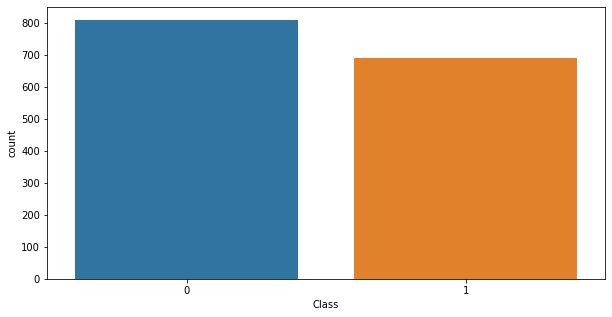

In [13]:
# Ploting the Class feature to analyse the count of 1's and 0's
plt.subplots(figsize=(10,5))
sns.countplot(df['Class'],data=df)
plt.show()

In [14]:
df.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
F1,1.000000,0.750944,-0.637508,0.762769,0.837365,0.888977,-0.763419,0.194739,0.276405,0.672167,-0.753287,0.706639,0.834246,-0.755101,-0.211100,-0.191255
F2,0.750944,1.000000,-0.611943,0.807678,0.873595,0.863027,-0.804545,0.207789,0.166323,0.611131,-0.794590,0.682649,0.855536,-0.804192,-0.121308,-0.068795
F3,-0.637508,-0.611943,1.000000,-0.637027,-0.681754,-0.738079,0.614027,0.238974,-0.336565,-0.599113,0.620092,-0.600153,-0.697186,0.630234,0.161890,0.144057
F4,0.762769,0.807678,-0.637027,1.000000,0.887500,0.877293,-0.809473,0.207080,0.181686,0.619599,-0.818105,0.675264,0.867305,-0.826213,-0.122998,-0.058308
F5,0.837365,0.873595,-0.681754,0.887500,1.000000,0.956640,-0.883349,0.224060,0.182643,0.727545,-0.873428,0.755121,0.906307,-0.884842,-0.138278,-0.080522
F6,0.888977,0.863027,-0.738079,0.877293,0.956640,1.000000,-0.868528,0.194345,0.229981,0.744822,-0.865109,0.742369,0.954840,-0.873724,-0.225362,-0.203649
F7,-0.763419,-0.804545,0.614027,-0.809473,-0.883349,-0.868528,1.000000,-0.205886,-0.176375,-0.614240,0.791322,-0.690864,-0.863434,0.813816,0.124089,0.057144
F8,0.194739,0.207789,0.238974,0.207080,0.224060,0.194345,-0.205886,1.000000,-0.251693,0.088436,-0.192413,0.069969,0.203882,-0.215099,-0.051295,-0.050738
F9,0.276405,0.166323,-0.336565,0.181686,0.182643,0.229981,-0.176375,-0.251693,1.000000,0.204661,-0.170702,0.012291,0.201330,-0.167082,0.013421,0.024064
F10,0.672167,0.611131,-0.599113,0.619599,0.727545,0.744822,-0.614240,0.088436,0.204661,1.000000,-0.595590,0.540342,0.721849,-0.599455,-0.254427,-0.266599


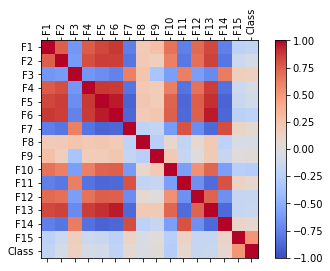

In [15]:
# Ploting the correlation between the features
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation.
When evaluating the correlation between all the features, the “corr()” method includes the correlation of each feature with itself, which is always 1, so that is why this type of graph always has the red diagonal from the upper left to the lower right. Other than the diagonal, the rest of the squares show correlation between different features. 

In [16]:
# Checking the unique values in our data
df.nunique()

F1       400
F2       646
F3        11
F4       656
F5       214
F6         4
F7       650
F8        80
F9       432
F10       91
F11      649
F12      141
F13      216
F14      660
F15      332
Class      2
dtype: int64

In [17]:
# Assigning the features of the train data set except the Target variable to X_train
X_train=df.drop(['Class'],axis=1)
X_train
X_train.shape

(1500, 15)

In [18]:
# Assigning the Target variable to y_train.
y_train=df['Class']
y_train.shape

(1500,)

In [19]:
# Loading the test data set
test_df = pd.read_csv("CE802_P2_Test.csv")
test_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,NaN,NaN
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,NaN,NaN
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.33,NaN
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.93,NaN
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.18,NaN


In [20]:
test_df.isnull().sum()

F1          0
F2          0
F3          0
F4          0
F5          0
F6          0
F7          0
F8          0
F9          0
F10         0
F11         0
F12         0
F13         0
F14         0
F15       750
Class    1500
dtype: int64

In [21]:
# By analysing the test data we can clearly see that there are about 750 null values in Feature - F15
# I will be taking the mean of the whole column and replace the null values with the mean just like we did in train data
test_df['F15'] = test_df['F15'].fillna(test_df['F15'].mean())

In [22]:
test_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,7.716347,NaN
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,7.716347,NaN
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.330000,NaN
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.930000,NaN
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.180000,NaN


In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   int64  
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  Class   0 non-null      float64
dtypes: float64(14), int64(2)
memory usage: 187.6 KB


In [24]:
X_test=test_df.drop(['Class'],axis=1)
y_test=test_df['Class']

### Training the model 

##### Decision Tree Classifier

In [25]:
# Importing metrics to evaluate the performance of our model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

In [26]:
from sklearn.tree import DecisionTreeClassifier
#setting my model to DecisionTree
# Creating Decision Tree classifer object
decision_tree = DecisionTreeClassifier()

# Training Decision Tree Classifer
decision_tree = decision_tree.fit(X_train,y_train)

# Declaring Score variable to find the Learning Score
decision_tree_score = []
score = decision_tree.score(X_train,y_train)
print('Decision Tree Performance')
print('Learning Score : ',score)
decision_tree_score = score*100

#Predict the response for test dataset
y_pred = decision_tree.predict(X_test)

# Declaring cvs vaiable to find Cross val score
decision_tree_cvs=[]
cv_score = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring='accuracy').mean()
print('Cross Val Score : ', cv_score)
decision_tree_cvs = cv_score*100


Decision Tree Performance
Learning Score :  1.0
Cross Val Score :  0.7953333333333333


##### Random Forest Classifier

In [27]:
#Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#setting my model to Random Forest
#Creating a Gaussian Classifier
random_forest = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
random_forest.fit(X_train,y_train)

# Declaring Score variable to find the Learning Score
random_forest_score = []
score = random_forest.score(X_train,y_train)
print('Random Forest Performance')
print('Learning Score : ',score)
random_forest_score = score*100

#Predict the response for test dataset
y_pred = random_forest.predict(X_test)

# Declaring cvs vaiable to find Cross val score
random_forest_cvs=[]
cv_score = cross_val_score(random_forest, X_train, y_train, cv=10, scoring='accuracy').mean()
print('Cross Val Score : ', cv_score)
random_forest_cvs = cv_score*100


Random Forest Performance
Learning Score :  1.0
Cross Val Score :  0.8653333333333333


##### Logistic Regression

In [28]:
#Importing Random Forest Model
from sklearn.linear_model import LogisticRegression

#setting my model to Logistic Regression
#Creating a Gaussian Classifier
logistic_regression = LogisticRegression(solver='liblinear', max_iter=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
logistic_regression.fit(X_train,y_train)

# Declaring Score variable to find the Learning Score
logistic_regression_score = []
score = logistic_regression.score(X_train,y_train)
print('Logistic Regression Performance')
print('Learning Score : ',score)
logistic_regression_score = score*100

#Predict the response for test dataset
y_pred = logistic_regression.predict(X_test)

# Declaring cvs vaiable to find Cross val score
logistic_regression_cvs=[]
cv_score = cross_val_score(logistic_regression, X_train, y_train, cv=10, scoring='accuracy').mean()
print('Cross Val Score : ', cv_score)
logistic_regression_cvs = cv_score*100


Logistic Regression Performance
Learning Score :  0.8086666666666666
Cross Val Score :  0.7986666666666667


In [29]:
# Creating a data frame to compare the Machine learning model and to chose the best model based on the accuracy
data = {'Machine Learning Models':  ['Decision Tree Classifier', 'Random Forest Classifier','Logistic Regression'],
        'Cross Val Score': [decision_tree_cvs, random_forest_cvs, logistic_regression_cvs],
        'Learning Score' : [decision_tree_score, random_forest_score, logistic_regression_score]
        
        }

df_comp = pd.DataFrame (data, columns = ['Machine Learning Models','Cross Val Score', 'Learning Score'])

df_comp

,Machine Learning Models,Cross Val Score,Learning Score
0,Decision Tree Classifier,79.533333,100.000000
1,Random Forest Classifier,86.533333,100.000000
2,Logistic Regression,79.866667,80.866667


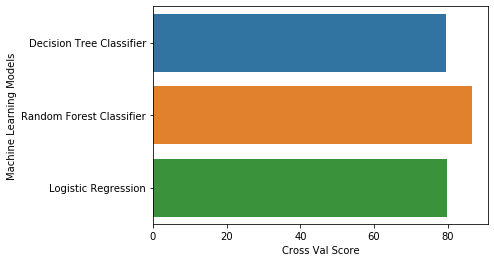

In [30]:
# Visualisation of Cross Val Scores
sns.barplot(x=df_comp['Cross Val Score'], y=df_comp['Machine Learning Models'], data=df_comp)

From the above analysis of the performance the machine learning models, we can clearly say that Random Forest Classifier is performing well based on cross val score and learning score compared to other models.

Using GridSearchCV for HyperParameter tuning and to fit our estimator (model) on our training set.

In [31]:
from sklearn.model_selection import GridSearchCV
parameter = {'max_depth':range(1,10)}
clf = GridSearchCV(estimator=RandomForestClassifier(), 
                    param_grid=parameter,
                    cv=5,
                    refit=True,
                    error_score=0,
                    n_jobs=-1)

clf.fit(X_train, y_train)
clf.best_score_

0.8640000000000001

##### After Hyper Parameter tuning, the Random Forest Classifier is giving an accuracy of 86.4%.
Hence, I am proceeding with our final model using Random Forest Classifier

### Prediction on a hold-out test set

In [32]:
# Using the Random Forest Classifier for our final model
random_forest_classifier=RandomForestClassifier(n_estimators=500, max_features= 'auto',min_samples_split=4)
random_forest_classifier.fit(X_train,y_train)
random_forest_classifier.score(X_train,y_train)
random_forest_classifier_pred=random_forest_classifier.predict(X_test)

In [33]:
# Saving the predicted values to test data to the target variable
X_test["Class"] = random_forest_classifier_pred
X_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,7.716347,1
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,7.716347,1
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.330000,0
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.930000,0
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.180000,1


In [35]:
X_test.to_csv("CE802_P2_Test.csv")